# Welcome to the Beginner Python Workshop 

**Topic: Scripting and plotting with a dataset**

This notebook will give you a basic introduction to the Python world. Some of the topics mentioned below is also covered in the [tutorials and tutorial videos](https://github.com/GuckLab/Python-Workshops/tree/main/tutorials)

Eoghan O'Connell, Guck Division, MPL, 2021

In [1]:
# notebook metadata you can ignore!
info = {"workshop": "05",
        "topic": ["solution", "exercise",
                  "scripting", "plotting", "pandas",
                  "matplotlib", "csv", "iris", "data",
                  "curve fitting"],
        "version" : "0.1.0"}

### How to use this notebook

- Click on a cell (each box is called a cell). Hit "shift+enter", this will run the cell!
- You can run the cells in any order!
- The output of runnable code is printed below the cell.
- Check out this [Jupyter Notebook Tutorial video](https://www.youtube.com/watch?v=HW29067qVWk).

See the help tab above for more information!


# What is in this Workshop?
In this notebook we cover:
- How to do the exercise from Workshop 05

In [2]:
# import necessary modules
%matplotlib nbagg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

## Exercises

1. Create a plot from a spreadsheet that includes a scatter plot and a curve fit
2. Add the following to the above plot:
   - Adjust the colors, markers, alpha etc. Change the fontsize of the the title and x,y labels
   - Make some custom axis ticks
   - Add a legend
   - A subfigure with a bar chart and a box plot
3. Save the plot in publication-ready resolution.


## Solutions

### Exercise 1
Create a plot from a spreadsheet that includes a scatter plot and a curve fit

In [3]:
# open the spreadsheet with pandas

df = pd.read_csv(r"../../data/iris.csv")

In [4]:
df.head() # prints the first five values of the file

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail() # prints the last five values of the file

,sepallength,sepalwidth,petallength,petalwidth,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Create a scatter plot using the pandas dataframe (`df`)

<IPython.core.display.Javascript object>


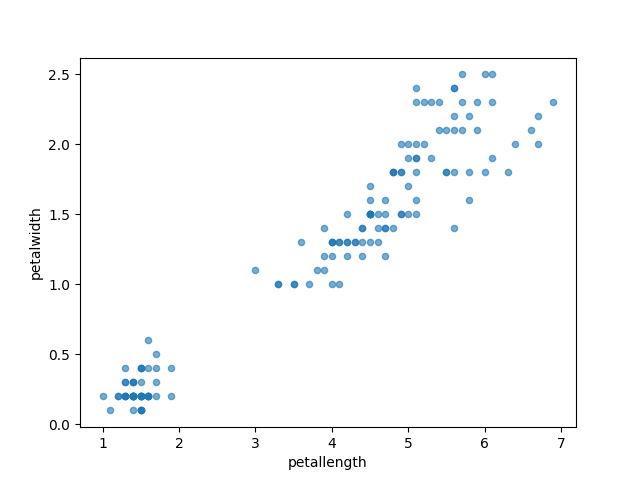

<AxesSubplot: xlabel='petallength', ylabel='petalwidth'>

In [6]:
df.plot.scatter(x="petallength", y="petalwidth", alpha=0.6)

Let's add a title...

<IPython.core.display.Javascript object>


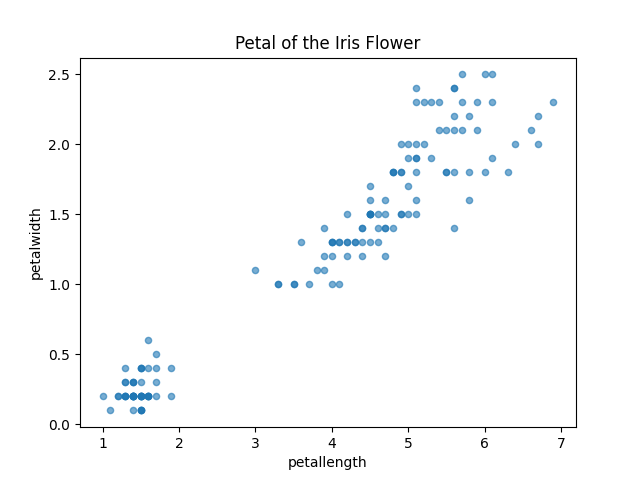

Text(0.5, 1.0, 'Petal of the Iris Flower')

In [7]:
df.plot.scatter(x="petallength", y="petalwidth", alpha=0.6)

title= "Petal of the Iris Flower"

plt.title(title)

How do we fit a line to this data and plot it?

First we define a function, in this case we use the linear `y=mx+c` function...

In [8]:
def linear_fit(x, m, c):
    y = (m * x) + c
    return(y)

Let'sd have a look at what this function outputs when we feed in the x data, and example values for m and c...

In [9]:
x_data = df['petallength']
y_fit= linear_fit(x=x_data, m=0.5, c=0)

# we get the y position along the straight line fit for the given x data
print(y_fit)

0      0.70
1      0.70
2      0.65
3      0.75
4      0.70
       ... 
145    2.60
146    2.50
147    2.60
148    2.70
149    2.55
Name: petallength, Length: 150, dtype: float64


However, we wouldn't normally guess the factors in our equation like that, we would use a curve fitting algorithm to minimize some error in the straight line fit for the data.

For that, we have the `curve_fit` function from scipy...

In [10]:
x_label = 'petallength'
y_label = 'petalwidth'

x_data = df[x_label]
y_data = df[y_label]
popt, pcov = curve_fit(linear_fit, x_data, y_data)

`curve_fit` outputs two things: `popt` and `pcov`. [See details in the docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

- `popt` is the **opt**imal values for the parameters (in this case `m` and `c`).
- `pcov` is the **cov**ariance of `popt`. You can use it to get the errors e.g. `perr = np.sqrt(np.diag(pcov))`

In [11]:
popt

array([ 0.41641913, -0.36651405])

In [12]:
pcov

array([[ 9.24009095e-05, -3.47304220e-04],
       [-3.47304220e-04,  1.59114368e-03]])

We can get the straight line fit y values for our x data by plugging the `popt` optimized parameters into our equation...

In [13]:
y_pred = linear_fit(x_data, *popt)

<IPython.core.display.Javascript object>


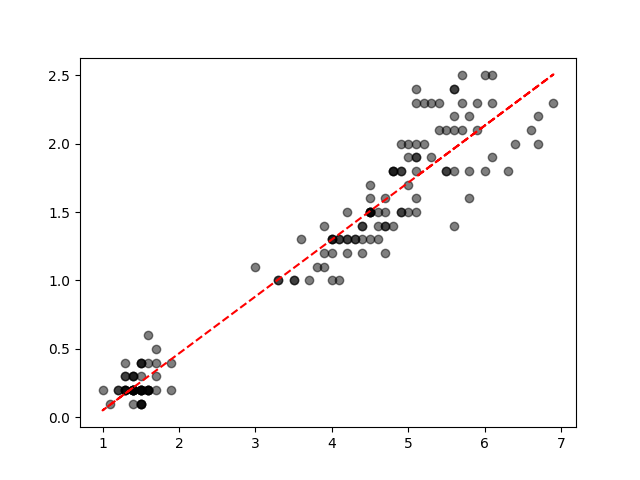

In [14]:
# notice how we are now using matplotlib only to plot

plt.figure()
plt.scatter(x_data, y_data, alpha=0.5, color='black')
plt.plot(x_data, y_pred, "r--")
plt.show()

Let's add some info to the plot...

In [15]:
# define some useful variables
units = " (cm)"
title= "Petal of the Iris Flower"

<IPython.core.display.Javascript object>


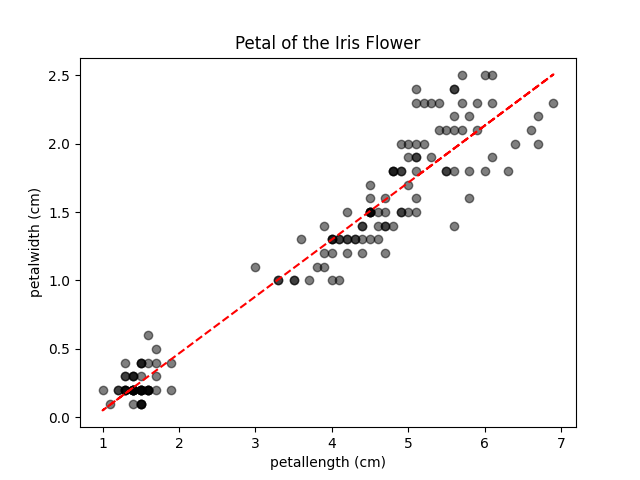

In [16]:
plt.figure()
plt.scatter(x_data, y_data, alpha=0.5, color='black')
plt.plot(x_data, y_pred, "r--")

plt.xlabel(x_label + units)
plt.ylabel(y_label + units)
plt.title(title)

plt.show()


### Exercise 2

Add the following to the above plot:
   - Adjust the colors, markers, alpha etc. Change the fontsize of the the title and x,y labels
   - Make some custom axis ticks
   - Add a legend
   - A subfigure with a bar chart and a box plot


Adjust the colors, markers, alpha.

Change the fontsize of the the title and x,y labels.

In [17]:
fontsize_title = 20
fontsize_labels = 16
fontsize_ticks = 12

<IPython.core.display.Javascript object>


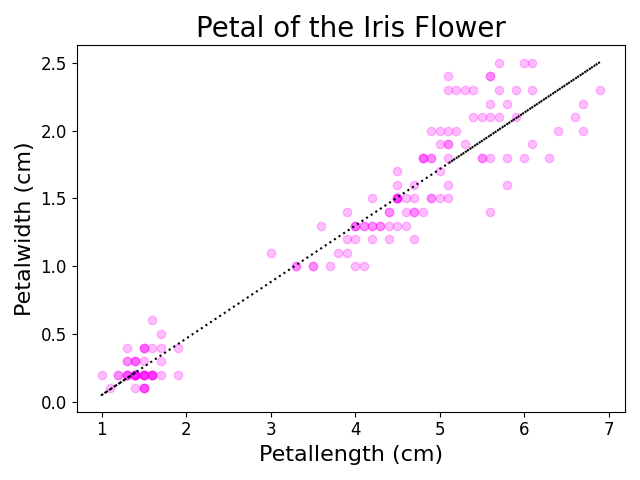

In [18]:
plt.figure()
plt.scatter(x_data, y_data, alpha=0.25, color='magenta')
plt.plot(x_data, y_pred, "k:")

# capitalize the label and specify the fontsize
plt.xlabel(x_label.capitalize() + units, fontsize=fontsize_labels)
plt.ylabel(y_label.capitalize() + units, fontsize=fontsize_labels)

# specify the title fontsize
plt.title(title, fontsize=20)

# specify the tick size
plt.xticks(fontsize=fontsize_ticks)
plt.yticks(fontsize=fontsize_ticks)

# use a tight layout 
plt.tight_layout()
plt.show()


Make some custom axis ticks

In [19]:
# make some custom axis ticks
x_ticks = np.arange(x_data.min(), x_data.max()+0.5, 0.5)
print(x_ticks)

[1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7. ]


<IPython.core.display.Javascript object>


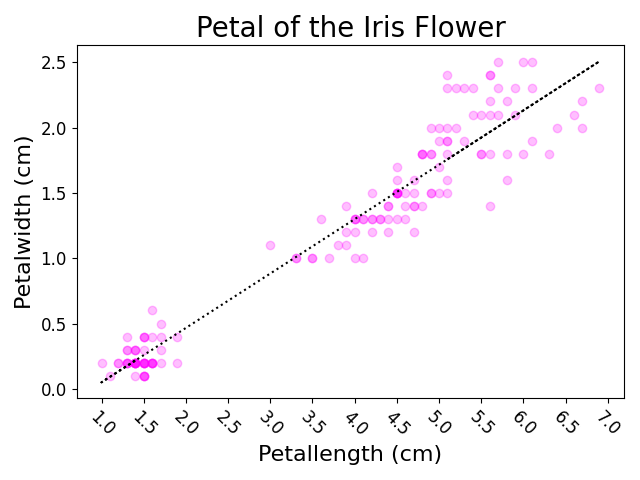

In [20]:
plt.figure()
plt.scatter(x_data, y_data, alpha=0.25, color='magenta')
plt.plot(x_data, y_pred, "k:")
plt.xlabel(x_label.capitalize() + units, fontsize=fontsize_labels)
plt.ylabel(y_label.capitalize() + units, fontsize=fontsize_labels)
plt.title(title, fontsize=20)

# make some custom axis ticks
plt.xticks(x_ticks, fontsize=fontsize_ticks, rotation=-45)
plt.yticks(fontsize=fontsize_ticks)

plt.tight_layout()
plt.show()


Add a legend

<IPython.core.display.Javascript object>


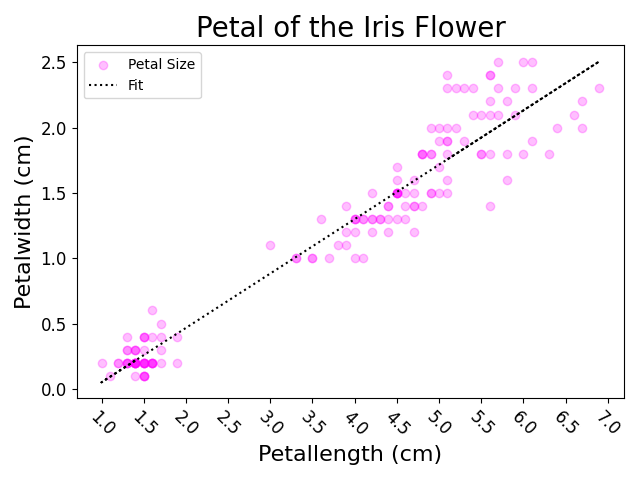

In [21]:
plt.figure()

# legend info needs to be included when creating the plots via the label keyword
plt.scatter(x_data, y_data, alpha=0.25, color='magenta', label='Petal Size')
plt.plot(x_data, y_pred, "k:", label='Fit')
plt.xlabel(x_label.capitalize() + units, fontsize=fontsize_labels)
plt.ylabel(y_label.capitalize() + units, fontsize=fontsize_labels)
plt.title(title, fontsize=20)

plt.xticks(x_ticks, fontsize=fontsize_ticks, rotation=-45)
plt.yticks(fontsize=fontsize_ticks)

plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Add fit and error info to the legend...

In [22]:
m, c = popt

<IPython.core.display.Javascript object>


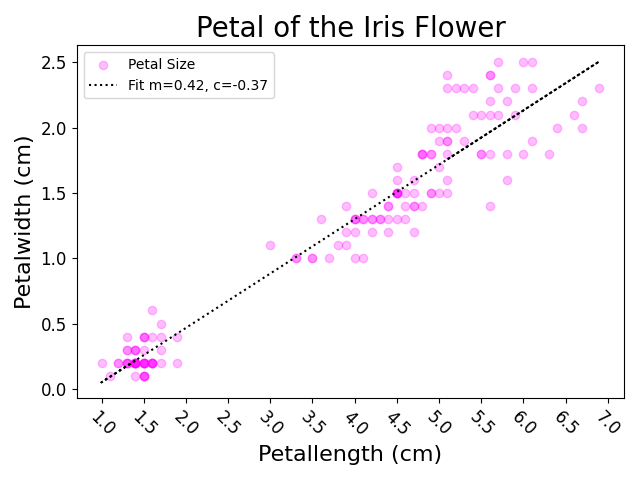

In [23]:
plt.figure()

plt.scatter(x_data, y_data, alpha=0.25, color='magenta', label='Petal Size')
plt.plot(x_data, y_pred, "k:",
         label=f'Fit {m=:.2f}, {c=:.2f}')

plt.xlabel(x_label.capitalize() + units, fontsize=fontsize_labels)
plt.ylabel(y_label.capitalize() + units, fontsize=fontsize_labels)
plt.title(title, fontsize=20)

plt.xticks(x_ticks, fontsize=fontsize_ticks, rotation=-45)
plt.yticks(fontsize=fontsize_ticks)

plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


A subfigure with a box plot

In [24]:
# get the mean of each length of each class and show them in a bar plot

measurement = "petallength"
mean_setosa = df[0:50].mean(numeric_only=True)[measurement]
mean_versicolor = df[50:100].mean(numeric_only=True)[measurement]
mean_virginica = df[100:150].mean(numeric_only=True)[measurement]

<IPython.core.display.Javascript object>


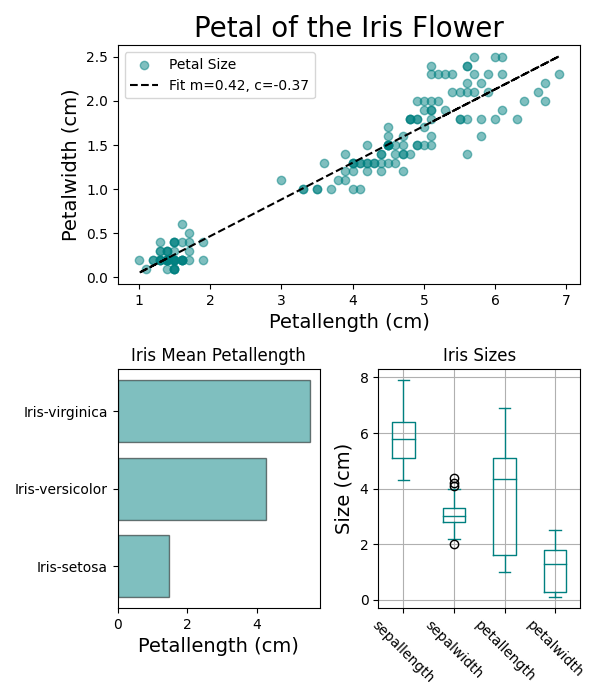

In [25]:
# notice how we are using matplotlib Axes now! 

color_data = 'teal'
fontsize_labels = 14

fig = plt.figure(figsize = (6,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

ax1.scatter(x_data, y_data, alpha=0.5, color=color_data, label='Petal Size')
ax1.plot(x_data, y_pred, "k--",
         label=f'Fit {m=:.2f}, {c=:.2f}')
ax1.set_xlabel(x_label.capitalize() + units, fontsize=fontsize_labels)
ax1.set_ylabel(y_label.capitalize() + units, fontsize=fontsize_labels)
ax1.set_title(title, fontsize=fontsize_title)
ax1.legend(loc='upper left')

ylabels = df["class"].unique()
ax2.barh(df["class"].unique(), [mean_setosa, mean_versicolor, mean_virginica],
         color=color_data, alpha=0.5, edgecolor='k')
ax2.set_title(f"Iris Mean {measurement.capitalize()}")
ax2.set_xlabel(measurement.capitalize() + units, fontsize=fontsize_labels)

df.boxplot(rot=-45, color=color_data, ax=ax3, fontsize=fontsize_labels-4)
ax3.set_title(f"Iris Sizes")
ax3.set_ylabel('Size' + units, fontsize=fontsize_labels)

plt.tight_layout()
plt.show()



### Exercise 3

Save the plot in publication-ready resolution.

We normally save like so:

`plt.savefig("my_plot.png")`

but this will save ourfigure at a low-ish resolution. Instead we should specify what the journal requires (~300-500 dpi)

`plt.savefig("my_plot.png", dpi=300)`

<IPython.core.display.Javascript object>


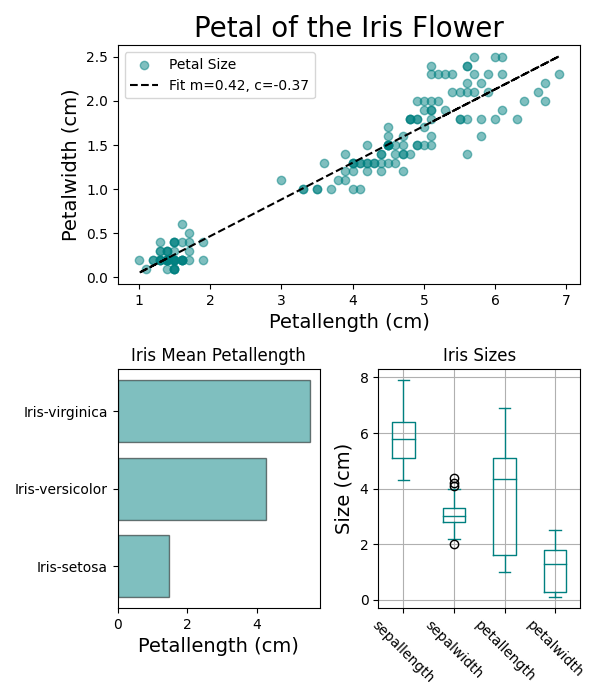

In [26]:
# notice how we are using matplotlib Axes now! 

color_data = 'teal'
fontsize_labels = 14

fig = plt.figure(figsize = (6,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

ax1.scatter(x_data, y_data, alpha=0.5, color=color_data, label='Petal Size')
ax1.plot(x_data, y_pred, "k--",
         label=f'Fit {m=:.2f}, {c=:.2f}')
ax1.set_xlabel(x_label.capitalize() + units, fontsize=fontsize_labels)
ax1.set_ylabel(y_label.capitalize() + units, fontsize=fontsize_labels)
ax1.set_title(title, fontsize=fontsize_title)
ax1.legend(loc='upper left')

ylabels = df["class"].unique()
ax2.barh(df["class"].unique(), [mean_setosa, mean_versicolor, mean_virginica],
         color=color_data, alpha=0.5, edgecolor='k')
ax2.set_title(f"Iris Mean {measurement.capitalize()}")
ax2.set_xlabel(measurement.capitalize() + units, fontsize=fontsize_labels)

df.boxplot(rot=-45, color=color_data, ax=ax3, fontsize=fontsize_labels-4)
ax3.set_title(f"Iris Sizes")
ax3.set_ylabel('Size' + units, fontsize=fontsize_labels)

plt.tight_layout()
plt.show()

# lower res (default)
plt.savefig('../data/iris_petal_plot_dpi-150.png', dpi=150)
plt.savefig('../data/iris_petal_plot_dpi-300.png', dpi=300)
